* 파이썬의 리스트, 컬렉션, 넘파이 등의 내부 데이터뿐 아니라 CSV 등의 파일을 쉽게 DataFrame으로 변경해 데이터의 가공/처리/분석을 편리하게 수행할 수 있게 해줌
* DataFrame : 판다스의 핵심객체로, 행과 열을 담는 데이터 구조체
* Series와 DataFrame은 모두 __Index를 key 값으로 갖고 있음__
* Series는 열이 하나, DataFrame은 열이 여러개인 데이터 구조체

### Pandas 시작- 파일을 DataFrame 로딩, 기본 API
* 다양한 포맷으로 된 파일을 DataFrame으로 로딩 가능
    * read_csv()    : 칼럼을 ','로 구분한 파일 포맷
    * read_table(), : '\t' 탭으로 구분
    * read_fwf()    : fixed with 즉, 고정 길이 기반의 칼럼 포맷을 변환
* read_csv()는 ','뿐 아니라 sep인자에 구분문자를 입력해서 어떤 필드 구분 문자 기반의 파일 포맷도 변환 가능
    * read_csv('파일경로/파일명', sep='\t') == read_table()

In [1]:
import pandas as pd

* read_csv()는 별다른 파라미터 지정이 없으면 파일의 맨 처음 행을 칼럼명으로 인지하고 변환 후, 콤마로 분리된 데이터 값들을 해당 칼럼에 맞게 할당
* 칼럼명이 표시되지 않은 첫 번째 컬럼은 판다스의 Index 객체 값

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df


titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('DataFrame 크기: ', titanic_df.shape)

DataFrame 크기:  (891, 12)


In [5]:
# 데이터 개수(행), 컬럼 수
# 컬럼명
# 결측치아닌 데이터값 count
# 컬럼별 데이터타입
# 전체 12개의 컬럼 타입 요약
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 데이터 개수, 분포도, 평균값, 표준편차, 최소값, 최대값, 25, 50, 75% 값
# 주의! 오직 숫자형(int, float), 카테고리형 칼럼의 분포도만 조사. 나머지는 제외
# 카테고리형
#    1. Survived : 1, 0
#    2. PClass : 1, 2, 3
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 특정 컬럼의 분포 살펴보기 DataFrame['컬럼명'] --> Series 형태로 반환
* value_counts() : 해당 컬럼의 유형과 건수 확인 가능, 오름차순으로 반환

In [7]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


* Series : Index와 단 하나의 컬럼으로 구성된 데이터 세트

In [8]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


* Series도 .head()사용 가능
* 왼쪽 컬럼은 DataFrame의 인덱스와 동일한 인덱스
* 오른쪽 컬럼은 Series의 해당 칼럼의 데이터값

In [9]:
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

* 단일 칼럼을 뽑아서 Series로 만든 후, value_counts()를 쓸 수도 있지만 번거로움
* value_counts() 이후에 나오는 Index는 단순 순차 값이 아닌(의미없는 식별자) 고유성이 보장된다면 의미있는 데이터값을 인덱스로 할당함
* 인덱스는 숫자뿐 아니라, 문자열도 가능함 (고유성이 보장된다면)

In [10]:
titanic_pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


* value_counts() 주의 사항!
    * Null 값을 무시하고 결과값을 내놓음
* 해결방안!
    * Null 값을 포함한 계산여부를 __dropna__ 인자로 판단
    * dropna의 기본값은 True이며, Null 값을 무시하고 개별 데이터 값의 건수를 계산함

In [12]:
print('titanic_df 데이터 건수:', titanic_df.shape[0])
print('기본 설정인 dropna=True로 value_counts()')

# value_counts()는 디폴트로 dropna=True이므로 value_counts(dropna=True)와 동일.
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Embarked'].value_counts(dropna=False))

titanic_df 데이터 건수: 891
기본 설정인 dropna=True로 value_counts()
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


### DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

__넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환하기__
* 리스트, 넘파이 ndarray는 칼럼명이 없기 때문에 DataFrame으로 변환시 칼럼명 지정해야함(안하면 자동으로 할당)
* 2차원 이하 데이터만 DataFrame으로 변환 가능

In [13]:
# 1차원 데이터 변환

import numpy as np

# 1차원 데이터 생성
col_name1=['col1'] # 컬럼명
list1 = [1, 2, 3]
array1 = np.array(list1)
print('array1 shape:', array1.shape )

# 리스트를 이용해 DataFrame 생성.
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)

# 넘파이 ndarray를 이용해 DataFrame 생성.
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [14]:
# 2차원 데이터 변환

# 3개의 칼럼명이 필요함.
col_name2=['col1', 'col2', 'col3']

# 2행x3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환.
list2 = [[1, 2, 3],
         [11, 12, 13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape )

df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)

df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [15]:
# 딕셔너리를 DataFrame으로 변환

# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


__DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기__

In [16]:
# DataFrame을 ndarray로 변환 (.values 사용)
array3 = df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


In [17]:
# DataFrame을 리스트로 변환 (values로 얻은 ndarray에 tolist() 호출)
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

# DataFrame을 딕셔너리로 변환 (to_dict('list')) 인자로 'list'입력하면 딕셔너리의 값이 리스트형으로 반환
dict3 = df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


### DataFrame의 컬럼 데이터 세트 생성과 수정 [ ] 연산자 이용

In [18]:
# 새로운 칼럼 Age_0 추가 후 일괄적으로 0 할당.
# Series가 기존 DataFrame에 추가됨
titanic_df['Age_0']=0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [19]:
# 기존 칼럼 Series의 데이터를 이용해 새로운 칼럼 Series 생성
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


In [20]:
# 기존 칼럼에 값을 일괄적으로 업데이트 해보기
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


### DataFrame 데이터 삭제
* drop() 메서드 이용
* drop() 메서드의 원형
> DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, erros='raise')
* 가장 중요한 파라미터 3개 : labels, axis, inplace
* axis 값에 따라 특정 열(axis=1) 또는 행(axis=0) 드롭
* (axis=0) 을 하면 labels에 오는 값을 인덱스로 간주함 : 이상치 제거시 주로 사용

In [21]:
# Age_0 열 삭제해보기
titanic_drop_df = titanic_df.drop('Age_0', axis=1 )
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1


In [22]:
# 원본 데이터 다시 불러보면 Age_0 열이 삭제 안된 것을 볼 수 있음
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


In [23]:
# 바로 적용을 위해 inplace=True를 해줘야함

drop_result = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True)
print(' inplace=True 로 drop 후 반환된 값:',drop_result)
titanic_df.head(3)

 inplace=True 로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* 주의사항!
    * inplace=True를 하면 반환값이 None이 됨 'drop_result'로 확인가능
    * 때문에 inplace=True를 적용한채로  다시 원본 DataFrame 객체로 할당하면 안됨!
    * titanic_df 객체 변수를 아예 None으로 만들어 버림
> titanic_df = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True)
    

In [24]:
# axis=0으로 설정해 index 0, 1, 2 (맨 앞 3개 데이터) 행 삭제해보기

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([0,1,2], axis=0, inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


### Index 객체
* DataFrame, Series에서 Index 객체만 추출 : DataFra.index, Series.index 
* 반환된 Index 객체의 실제 값은 넘파이 1차원 ndarray
* Index 객체의 values 속성으로 ndarray값 알 수 있음

In [25]:
# 원본 파일 재 로딩 
titanic_df = pd.read_csv('titanic_train.csv')
# Index 객체 추출
indexes = titanic_df.index
print(indexes)
# Index 객체를 실제 값 arrray로 변환 
print('Index 객체 array값:\n',indexes.values)


RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [26]:
# 딘일값 반환 및 슬라이싱 가능

print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


In [27]:
# 한 번 만들어진 DataFrame 및 Series의 Index 객체는 함부로 변경 불가

indexes[0] = 5

TypeError: Index does not support mutable operations

In [28]:
# Series 객체에서 연산함수를 적용할 때 Index는 연산에서 제외됨.
# Index는 오직 식별용으로만 사용됨

series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n',(series_fair + 3).head(3) )

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.949299999967
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


* DataFrame 및 Series에 __reset_index()__ 메서드 수행하면 새롭게 인덱스를 연속 숫자형으로 할당
* 기존 인덱스는 'index'라는 새로운 칼럼명으로 추가됨
* 인덱스가 연속된 int 숫자형 데이터가 아닐 경우 사용

In [29]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S


* Series에 reset_index() 적용하면 Series가 아닌 __DataFrame이 반환__
* 기존 인덱스가 칼럼으로 추가돼 칼럼이 2개가 되기 때문 (Series는 컬럼1개 갖는 데이터)
* reset_index() 적용시 인자로 __drop=True__ 넣어주면 기존 인덱스가 새로운 칼럼으로 추가되지 않고 삭제됨. 이 경우에는 __Series 형태로 유지__

In [34]:
# 앞서 고유 값이 식별자 인덱스 역할을 했으나, 연속 숫자형 인덱스로 바꿔보기

print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))

new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

dropTrue = value_counts.reset_index(inplace=False, drop=True)
print('### After reset_index ###')
print(dropTrue)
print('dropTrue 객체 변수 타입:',type(dropTrue))

### before reset_index ###
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   Pclass  count
0       3    491
1       1    216
2       2    184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>
### After reset_index ###
0    491
1    216
2    184
Name: count, dtype: int64
dropTrue 객체 변수 타입: <class 'pandas.core.series.Series'>


### 데이터 셀렉션 및 필터링
* 넘파이 데이터 추출 방식 : '[ ]' 연산자에 단일값, 슬라이싱, 팬시 인덱싱, 불린 인덱싱 사용
* pandas 데이터 추출 방식 : iloc[ ], loc[ ]
* DataFrame의 [ ] 연산자와 넘파이의 [ ] 연산자 차이 알아보기
    1. numpy [ ] 연산자 : 행, 열의 위치, 슬라이싱 범위 지정
    2. DataFrame [ ] 연산자 : 칼럼명 문자(or 칼럼명의 리스트 객체), 인덱스

__DataFrame의 [ ] 연산자__

* DataFrame에 ['칼럼명'] 사용해 해당 칼럼 데이터의 일부 추출
* 여러개 칼럼 추출시 DataFrame에 ['칼럼명1', '칼럼명2']처럼 리스트 객체 이용
* titanic_df[0]이나 titanic_df[0, 1, 2]는 오류 발생

In [35]:
print('단일 컬럼 데이터 추출:\n', titanic_df[ 'Pclass' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', titanic_df[ ['Survived', 'Pclass'] ].head(3))
print('[ ] 안에 숫자 index는 KeyError 오류 발생:\n', titanic_df[0])

단일 컬럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 컬럼들의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

* 슬라이싱 이용하면 숫자 넣어도 원하는 데이터 추출 가능함

In [36]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C


* 불린 인덱싱 표현도 가능

In [37]:
titanic_df[ titanic_df['Pclass'] == 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


__정리__
1. DataFrame 바로뒤의 [ ] 연산자는 넘파이의 [ ] 나 Series의 [ ]와 다름
2. DataFrame 바로뒤의 [ ] 내 입력값은 칼럼명 또는 칼럼의 리스트, 불린 인덱스 용도로만 사용
3. DataFrame[0:2]와 같은 슬라이싱 연산으로 데이터 추출 방식은 지양함

__DataFrame iloc[ ] 연산자__
* iloc[ ]는 위치(location)기반 인덱싱 방식으로 동작
* 행과 열의 위치를, 0을 시작으로 하는 세로축, 가로축 좌표 정숫값으로 지정

In [38]:
# 인덱스와 컬럼명이 문자열로 이뤄진 DataFrame 생성

data = {'Name': ['Chulmin', 'Eunkyung','Jinwoong','Soobeom'],
        'Year': [2011, 2016, 2015, 2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']
       }
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [39]:
# 첫 번째 행, 첫 번째 열의 데이터 추출
data_df.iloc[0, 0]

'Chulmin'

In [40]:
# 아래 코드는 오류를 발생시킵니다. 정수값이 아니기 때문
data_df.iloc[0, 'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [41]:
# 아래 코드는 오류를 발생합니다.
data_df.iloc['one', 0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

* 열 위치에 -1 입력 : 가장 마지막 열 데이터 가져올 수 있음

In [42]:
print("\n 맨 마지막 칼럼 데이터 [:, -1] \n", data_df.iloc[:, -1])
print("\n 맨 마지막 칼럼을 제외한 모든 데이터 [:, :-1] \n", data_df.iloc[: , :-1])


 맨 마지막 칼럼 데이터 [:, -1] 
 one        Male
two      Female
three      Male
four       Male
Name: Gender, dtype: object

 맨 마지막 칼럼을 제외한 모든 데이터 [:, :-1] 
            Name  Year
one     Chulmin  2011
two    Eunkyung  2016
three  Jinwoong  2015
four    Soobeom  2015


__DataFrame loc[ ] 연산자__
* loc[ ]는 명칭(Label) 기반 인덱싱 방식으로 동작
* 행 : 데이터 프레임의 인덱스 값, 열 : 칼럼의 명칭으로 지정
* loc[인덱스값, 칼럼명]

In [43]:
data_df.loc['one', 'Name']

'Chulmin'

In [48]:
# 오류 발생 : 인덱스 정수로 이루어진 DataFrame이 아니기 때문
data_df_reset.loc[0, 'Name']

NameError: name 'data_df_reset' is not defined

* loc[ ]에 슬라이싱 기호 ':' 사용시 주의점
* loc은 [0:3] 이면 (0, 1, 2)가 아닌, (0, 1, 2, 3)을 의미함(명칭기반 인덱싱의 특성)
* 명칭은 숫자형이 아닐 수 있으므로 __'-1'은 불가능__

In [46]:
print('위치기반 iloc slicing\n', data_df.iloc[0:1, 0],'\n')
print('명칭기반 loc slicing\n', data_df.loc['one':'two', 'Name'])

위치기반 iloc slicing
 one    Chulmin
Name: Name, dtype: object 

명칭기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


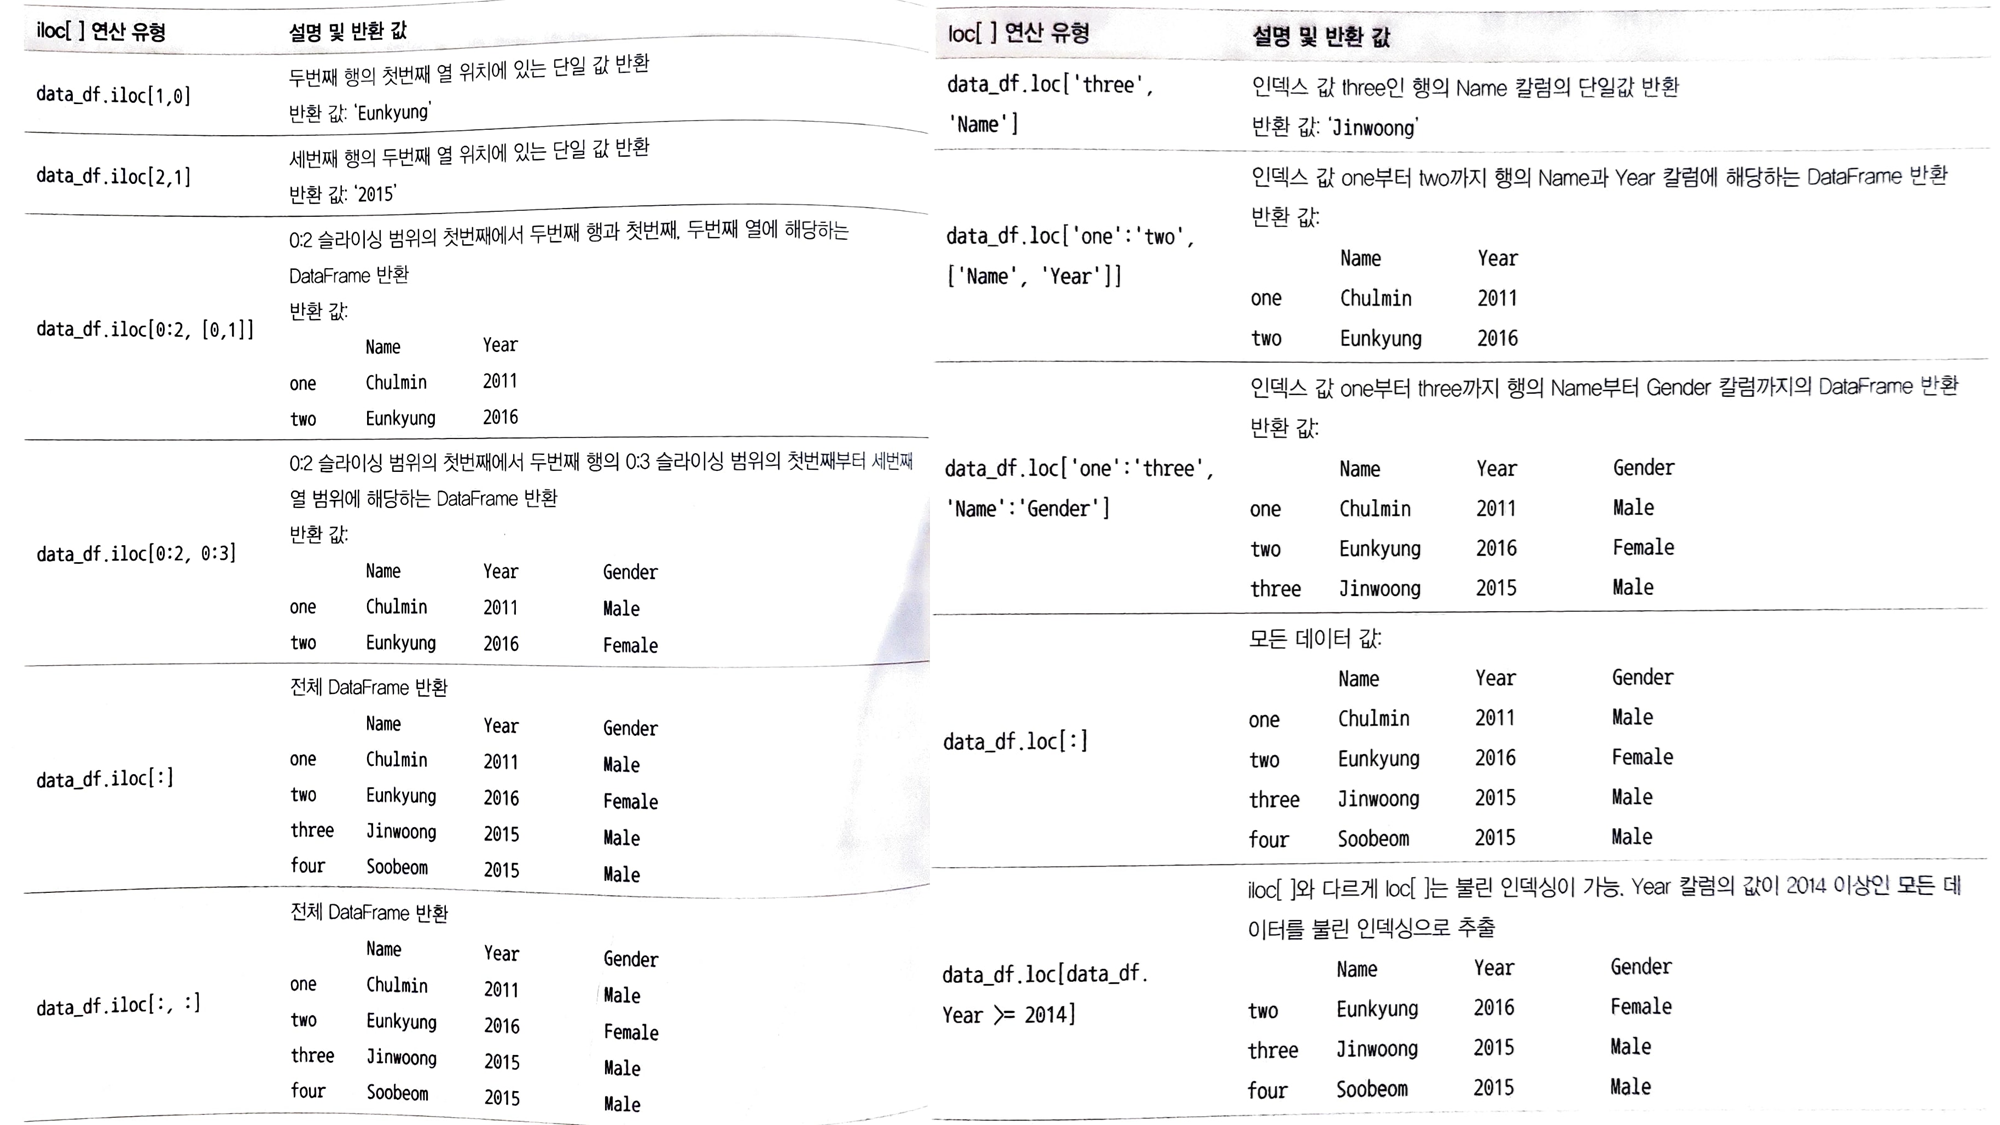

__정리__
1. 개별 혹은 여러 컬럼 값 전체 추출시 DataFrame['컬럼명'] 사용
2. 행과 열을 함께 사용하여 데이터 추출시 iloc[ ]이나 loc[ ] 사용
3. iloc[ ] 위치기반 인덱싱, 행과 열의 위치를 정수값으로 지정
4. loc[ ] 명칭 기반 인덱싱 행 위치에 DataFrame의 인덱스, 열에는 컬럼명 지정
5. 명칭 기반 인덱싱 loc[ ] 사용시 '시작점:종료점' 지정할 때 종료점까지 포함된 위치에 있는 데이터를 반환함

__불린 인덱싱__
* [ ], loc[ ]에 모두 지원.
* iloc[ ] 지원 x
* 반환된 객체 타입 : DataFrame

In [49]:
# 승객 나이가 60세 이상인 데이터 추출

titanic_df = pd.read_csv('titanic_train.csv')
titanic_boolean = titanic_df[titanic_df['Age'] > 60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. ...",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr...",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


* 반환된 객체 타입이 DataFrame 이므로 원하는 컬럼명만 별도로 추출할 수 있음

In [50]:
# 60세 이상인 승객의 나이와 이름만 추출

titanic_df[titanic_df['Age'] > 60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


* loc[ ]도 사용가능 단, __['Name','Age']는 칼럼 위치에 놓여야 함__

In [51]:
titanic_df.loc[titanic_df['Age'] > 60, ['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


* 여러 조건 병합 가능
    1. and 조건 : &
    2. or 조건 : |
    3. Not 조건 : ~

In [52]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


* 개별 조건을 변수에 할당 후, 변수를 결합해도 사용 가능

In [53]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df[ cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


### 정렬, Aggregation함수, GroupBy 적용

__DataFrame, Series의 정렬 - sort_values()__
* 주요 파라미터 : by, ascending, inplace
* by : 특정 칼럼 입력하면 해당 칼럼으로 정렬 수행
* ascending=True : 오름차순 정렬 (default)
* ascending=False : 내림차순 정렬
* inplace=False 가 default

In [54]:
# 오름차순
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr....",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr....",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs...",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [55]:
# 내림차순
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Name'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,van Melkebe...,male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,van Billiar...,male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,de Pelsmaek...,male,16.0,0,0,345778,9.5,NaN,S


__Aggregation 함수 적용__
* min(), max(), sum(), count() __단, count()는 Null값 반영 안함__
* DataFrame에서 바로 aggregation 호출 시 __모든 칼럼__ 에 해당 aggregation 적용됨

In [58]:
# Age, Cabin, Embarked 는 Null값이 있어서 결과값이 다름
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [59]:
# 특정 칼럼에만 적용
titanic_df[['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

__groupby() 이용하기__
* 입력 파라미터 'by'에 '컬럼명' 입력 --> DataFrame 반환

In [60]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [61]:
# aggregation 함수 적용
# 대상 컬럼(Pclass) 제외한 모든 컬럼에 해당 aggregation 함수 적용
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [62]:
# Grouped된 객체에 [['PassengerId', 'Survived']]로 필터링 후 해당 칼럼에만 aggregation 함수 적용
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


* 서로 다른 aggregation 함수 적용할 경우
 1. DataFrameGroupBy 객체의 __agg()__ 내에 인자로 입력해서 사용
 2. agg() 내에 __딕셔너리 형태로__ aggregation이 적용될 칼럼들과 aggregation 함수 입력

In [63]:
# DataFrameGroupBy 객체의 __agg()__ 내에 인자로 입력해서 사용
titanic_df.groupby('Pclass')['Age'].agg([max, min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [64]:
# agg() 내에 딕셔너리 형태로 aggregation이 적용될 칼럼들과 aggregation 함수 입력
agg_format={'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


### 결손 데이터 처리하기
* 넘파이의 NaN으로 표시
* 기본적으로 머신러닝 알고리즘은 NaN 값을 처리하지 않으므로 다른 값으로 대체해야 함
* NaN 값은 평균, 총합 등의 함수 연산시 제외됨


__isna()로 결손 데이터 여부 확인__
* 모든 칼럼의 값이 NaN인지 아닌지를 True나 False로 알려줌

In [65]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [66]:
# 'sum()' 함수 호출 시 True는 숫자1로, False는 0으로 변환
# 즉, 결손 데이터의 개수를 구할 수 있음
titanic_df.isna( ).sum( )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

__fillna( ) 로 Missing 데이터 대체하기__
* 결손 데이터를 편리하게 다른 값으로 대체 가능

In [67]:
# Cabin 컬럼의 NaN값을 'C000'로 대체
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,C000,S


* 주의점!
* 반환값을 다시 DataFrame 객체에 할당하거나 inplace=True 파라미터를 추가해야 반영됨

In [68]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### apply lambda 식으로 데이터 가공
* 복잡한 데이터 가공이 필요할 경우 apply lambda 사용
* 단순하다면, 칼럼에 일괄적으로 데이터 가공을 하는게 속도 면에서 더 빠름
> squares = map(lambda x : x**2, a) 에서 ':'로 입력 인자와 반환될 인자의 계산식 분리.
* ':' 왼쪽에 있는 x :  입력 인자
* ':' 오른쪽 : 입력 인자의 계산식(반환값)

In [69]:
# lambda를 함수 구현한다면?
def get_square(a):
    return a**2

print('3의 제곱은:',get_square(3))

3의 제곱은: 9


In [70]:
# lambda 사용시
lambda_square = lambda x : x ** 2
print('3의 제곱은:',lambda_square(3))

3의 제곱은: 9


* lambda식 이용시, 여러 개의 값을 입력 인자로 사용할 경우 __map()__ 함수 결합

In [71]:
a=[1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [72]:
# DataFrame의 apply에 lambda식 사용해보기
# 'Name' 칼럼의 문자열 개수를 새로운'Name_len' 컬럼에 생성

titanic_df['Name_len']= titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr....",23
1,"Cumings, Mr...",51
2,"Heikkinen, ...",22


* __if else__ 절 사용
    * 주의 사항!
    * __if 식보다 반환값을 먼저 기술__ 해야함.
    * ':' 오른쪽에 반환값이 있어야 하기 때문
    * if, else 외에 if, else if, else와 같은 구조는 지원 안함
    * elif (else if) 이용방법 : else절을 ()로 내포해 () 내에서 다시 if else 적용!
    * () 안에서도 여전히 __if보다 반환값이 먼저 나옴__ 에 유의

In [73]:
# 나이가 15세 미만이면 Child, 그렇지 않으면 Adult로 구분하는 새로운 칼럼에 할당

titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <=15 else 'Adult' )
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [74]:
# if else 사용법

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x <= 60 else 
                                                                                  'Elderly'))
titanic_df['Age_cat'].value_counts()

Age_cat
Adult      786
Child       83
Elderly     22
Name: count, dtype: int64

In [75]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성. 
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 ‘Age’ 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
